In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations_with_replacement


In [41]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

def predict(X,w,b):
    z = np.dot(X,w)+b
    return sigmoid(z)

def compute_cost(X, y, w, b, lambda_=0.01):
    y_hats = predict(X, w, b)
    m = len(y_hats)
    
    loss = 0
    for i in range(m):
        y_hat = y_hats[i]
        ty = y[i]
        loss += ty * np.log(y_hat + 1e-15) + (1 - ty) * np.log(1 - y_hat + 1e-15)

    # Average cross-entropy loss
    loss = -loss / m

    # L2 regularization term (excluding bias b)
    reg_term = (lambda_ / (2 * m)) * np.sum(w ** 2)

    # Total cost
    cost = loss + reg_term
    return cost

def compute_gradient(X, y, w, b, lambda_=0.01):
    y_hats = predict(X, w, b)

    m, n = X.shape
    dw_sum = np.zeros(n)
    db_sum = 0

    for i in range(m):
        y_hat = y_hats[i]
        ty = y[i]
        xi = X[i]

        for j in range(n):
            xj = xi[j]
            dw_sum[j] += (y_hat - ty) * xj

        db_sum += (y_hat - ty)

    dw = dw_sum / m + (lambda_ / m) * w  # L2 regularization added to weights
    db = db_sum / m                      # Bias is not regularized

    return dw, db


def gradient_descent(X, y, w, b, alpha, epochs, lambda_=0.01):
    for i in range(epochs):
        dw, db = compute_gradient(X, y, w, b, lambda_)
        
        b = b - alpha * db
        w = w - alpha * dw

        if (i) % 10 == 0 or (i == epochs - 1):
            cost = compute_cost(X, y, w, b, lambda_)

        
            print('b=', b)
            print('w=', w)
            print('epoch=', i)
            print('cost=', cost)
    return w, b




def generate_polynomial_features(X, degree):
    """
    Generate polynomial features up to a given degree for DataFrame X.
    """
    if degree == 1:
        return X.copy()
    
    n_samples, n_features = X.shape
    columns = X.columns
    poly_features = [X]

    for d in range(2, degree + 1):
        for comb in combinations_with_replacement(columns, d):
            new_feature = X[comb[0]]
            for col in comb[1:]:
                new_feature *= X[col]
            poly_features.append(new_feature.rename(" * ".join(comb)))

    return pd.concat(poly_features, axis=1)


In [42]:


studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities  = 'Extracurricular Activities'
y_hat_column = 'Extracurricular Activities'
degree = 3

# Load data
df = pd.read_csv(studentsDS)
print(df.columns)
# Encode 'Extracurricular Activities' as binary
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Separate target and features BEFORE scaling
y = df[y_hat_column]  # keep it as DataFrame to scale later
X = df.drop(columns=[y_hat_column])



# Apply polynomial feature generation before converting to NumPy
X = generate_polynomial_features(X, degree)

# Scale features
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)


# Scale target
# y_scaler = StandardScaler()
# y_scaled = y_scaler.fit_transform(y)
# y = pd.Series(y_scaled.flatten(), name=y_hat_column)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=252)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=252)


# Print shapes
# print("X_train:", X_train.shape)
# print("y_train:", y_train.shape)
# print("X_cv:", X_cv.shape)
# print("y_cv:", y_cv.shape)
# print("X_test:", X_test.shape)
# print("y_test:", y_test.shape)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [46]:

alpha = 0.7
epochs = 600
lambda_= 0.7
b = 1
w = np.random.rand(X_train.shape[1]) * 0.01
X_train_sample = X_train.to_numpy()
y_train_sample = y_train.to_numpy()

print(w.shape)

w, b = gradient_descent(X_train_sample, y_train_sample, w, b, alpha, epochs, lambda_)

(55,)
b= 0.8361088697259217
w= [-0.00260042  0.00127812 -0.00313469 -0.00364168 -0.00128144  0.0013281
  0.00408165 -0.00401976 -0.00579226  0.00190866 -0.00717207 -0.01586402
 -0.00547843 -0.00294884 -0.00273223 -0.00291246 -0.00803364  0.00813233
  0.00037331 -0.00491709  0.00642508  0.00674337  0.00053892  0.01243426
 -0.00359362  0.00849347  0.00240556  0.00434786  0.00872178  0.00158806
  0.00414308  0.00244236  0.01682007  0.0057116   0.00447688 -0.00665752
 -0.00155403  0.01132094 -0.00634232  0.00660232 -0.00309532  0.00140474
  0.01352654 -0.00308102 -0.00112694 -0.00563801  0.00973439  0.00170316
 -0.00019999  0.00605614  0.00062857 -0.0011887   0.00059844 -0.00353199
  0.0044921 ]
epoch= 0
cost= 0.7796705505307149
b= 0.11658834002235402
w= [-0.00584037 -0.01465563 -0.01644833 -0.01190117  0.02982709  0.00406791
 -0.00180922 -0.03118752 -0.00756518  0.00640237 -0.02932571 -0.05267839
 -0.00190329  0.00762817 -0.03124551  0.01199335  0.01154053  0.01321716
  0.01268609  0.0275

[0.48699565 0.47375257 0.51170766 ... 0.40979249 0.54175766 0.40795794]
[0 0 1 ... 0 1 0]
Cost: 0.6818889321165925
Accuracy: 0.5585
classificationReport               precision    recall  f1-score   support

           0       0.56      0.57      0.57      3020
           1       0.56      0.54      0.55      2980

    accuracy                           0.56      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.56      0.56      0.56      6000

confusionMatrix [[1729 1291]
 [1358 1622]]


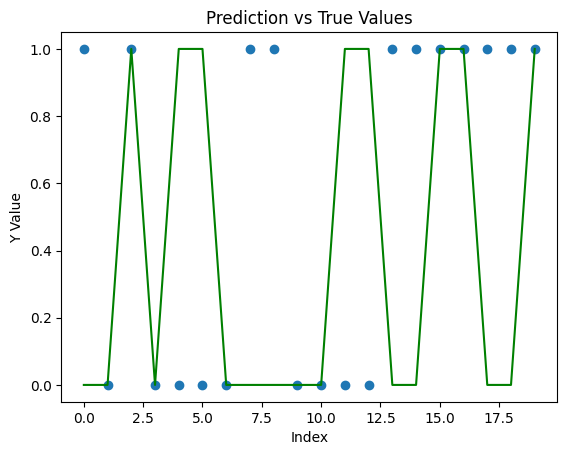

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


y_hats = predict(X_train_sample, w, b)
print(y_hats)
y_hats = (y_hats >= 0.5).astype(int)
print(y_hats)


cost = compute_cost(X_train_sample, y_train_sample, w, b)
accuracyScore = accuracy_score(y_train_sample.ravel(), y_hats)
confusionMatrix = confusion_matrix(y_train_sample.ravel(), y_hats)
classificationReport  = classification_report(y_train_sample.ravel(), y_hats)


print("Cost:", cost)
print("Accuracy:", accuracyScore)

print('classificationReport', classificationReport)
print('confusionMatrix', confusionMatrix)

plottingSample = 20

plt.scatter(range(plottingSample), y_train_sample[:plottingSample], label='True Y')
# plt.scatter(range(plottingSample), y_hats[:plottingSample],color='red' )
plt.plot(range(plottingSample), y_hats[:plottingSample], label='Predicted Y (Line)', color='green')
plt.title('Prediction vs True Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
# plt.legend()
plt.show()

# Accuracy: 0.5605